# Test out how Cartopy works relative to Basemap to consider switching

In [38]:
import cartopy.crs as ccrs
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import numpy as np
import pickle

%matplotlib inline

In [7]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

In [8]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon_sub   = np.array(mesh.variables['nav_lon'])[imin:imax,jmin:jmax]
lat_sub   = np.array(mesh.variables['nav_lat'])[imin:imax,jmin:jmax]
bathy_sub = np.array(mesh.variables['hdept'])[0,imin:imax,jmin:jmax]
lon_full   = np.array(mesh.variables['nav_lon'])
lat_full   = np.array(mesh.variables['nav_lat'])
bathy_full = np.array(mesh.variables['hdept'])[0,:,:]

In [9]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 

In [25]:
rotated_crs = cartopy.crs.RotatedPole(pole_longitude=20.0, pole_latitude=0)
flat_crs  = cartopy.crs.Miller(central_longitude=0)
npster    = cartopy.crs.NorthPolarStereo(central_longitude=-100)
plain_crs = cartopy.crs.PlateCarree()
globe_crs = ccrs.Orthographic(central_longitude=-60, central_latitude=20)

In [48]:
coastline = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='none', linewidth=0.8, facecolor='#8b7765')
waterline = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '10m', edgecolor='none', linewidth=0.4, facecolor="#183C51")

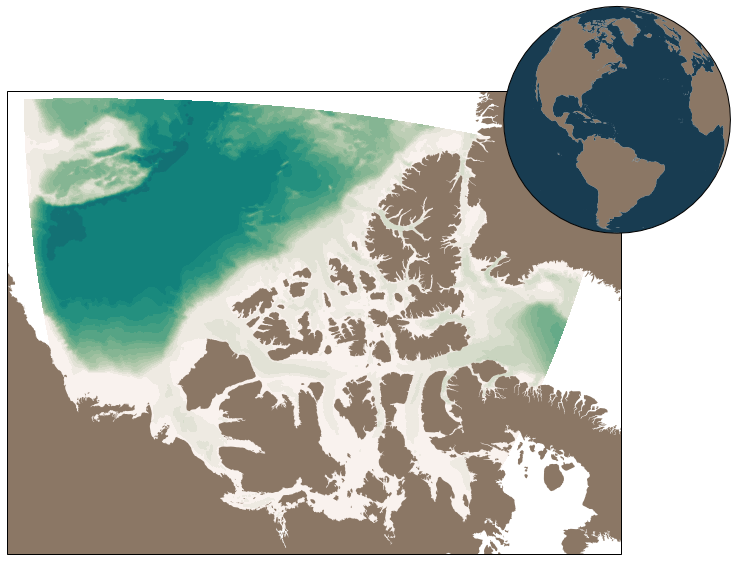

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(11, 9), \
                       subplot_kw={"projection": npster, "facecolor": "#8b7765"})

ax.add_feature(coastline)
ax.contourf(lon_sub, lat_sub, bathy_sub, 20, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)
# ax.contourf(lon, lat, bathy, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)

ax.set_extent([-140, -70, 78, 120], flat_crs)

ax2 = fig.add_axes([0.72, 0.64, 0.35, 0.35], projection=globe_crs)
ax2.add_feature(coastline)
ax2.add_feature(waterline)
# pickle the class instance.
pickle.dump((fig, ax, ax2), open('/ocean/brogalla/GEOTRACES/pickles/cartopy/surface-land-map-globe.pickle','wb'))

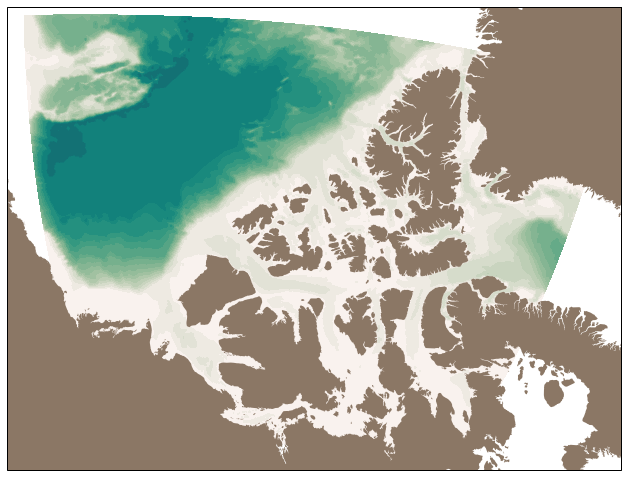

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(11, 9), \
                       subplot_kw={"projection": npster, "facecolor": "#8b7765"})

ax.add_feature(coastline)
ax.contourf(lon_sub, lat_sub, bathy_sub, 20, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)
# ax.contourf(lon, lat, bathy, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)

ax.set_extent([-140, -70, 78, 120], flat_crs)

# pickle the class instance.
pickle.dump((fig, ax), open('/ocean/brogalla/GEOTRACES/pickles/cartopy/surface-land-map.pickle','wb'))

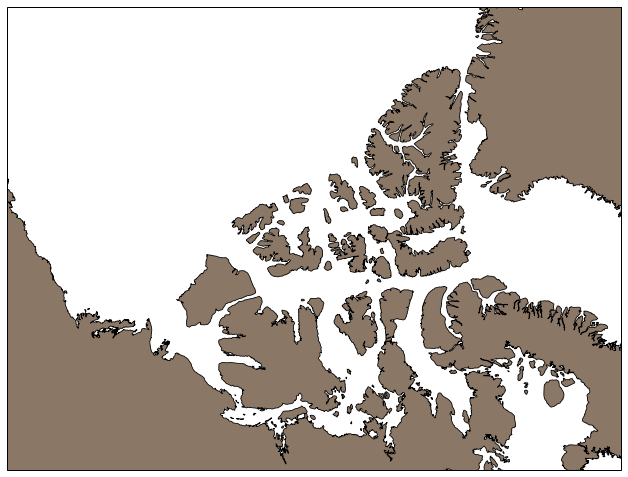

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(11, 9), \
                       subplot_kw={"projection": npster, "facecolor": "#8b7765"})

ax.add_feature(coastline)
# ax.contourf(lon_sub, lat_sub, bathy_sub, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)
# ax.contourf(lon, lat, bathy, transform=plain_crs, cmap=cmocean.cm.tempo, vmin=0, vmax=6000)

ax.set_extent([-140, -70, 78, 120], flat_crs)

# ax2 = fig.add_axes([0.72, 0.64, 0.35, 0.35], projection=globe_crs)
# ax2.add_feature(coastline)
# ax2.add_feature(waterline)

# pickle the class instance.
pickle.dump((fig, ax), open('/ocean/brogalla/GEOTRACES/pickles/cartopy/mn-reference2.pickle','wb'))